In [1]:
from scipy.stats import ranksums, sem

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def plot_res_errorbars(baseline, pif, title="Small MS"):
    baseline_df = pd.DataFrame(baseline)
    pif_df = pd.DataFrame(pif)

    means_df = pd.DataFrame({"baseline_mean" : baseline_df.mean(),
                                "pif_mean" : pif_df.mean(),
                                "baseline_sem" : sem(baseline_df),
                                "pif_sem" : sem(pif_df)})

    plot_df = means_df.loc[["bal_acc", "roc_auc", "sensitivity", "specificity"]]

    ax = plot_df.plot.bar(y=["baseline_mean", "pif_mean"],
                          yerr=plot_df[["baseline_sem", "pif_sem"]].T.values,
                          title=title)
    ax.legend(loc="lower center")
    plt.show()

    plot_df = means_df.loc[["early_stopping"]]

    ax = plot_df.plot.bar(y=["baseline_mean", "pif_mean"],
                          yerr=plot_df[["baseline_sem", "pif_sem"]].T.values,
                          title=title)
    ax.legend(loc="lower center")
    plt.show()

## ADNI

In [19]:
baseline_small = {
    "roc_auc" : [0.781476,0.895973,0.933077,0.915207,0.825342,0.921198,0.698529,0.8549,0.909091,0.843461],
    "bal_acc" : [0.703611,0.832612,0.830385,0.860522,0.755565,0.852351,0.656863,0.745427,0.787623,0.725694],
    "sensitivity" : [0.815385,0.766234,0.730769,0.828571,0.69863,0.931507,0.647059,0.783784,0.797468,0.722222],
    "specificity" : [0.591837,0.89899,0.93,0.892473,0.8125,0.773196,0.666667,0.707071,0.777778,0.729167],
    "early_stopping" : [80,79,117,106,99,92,113,61,107,65]
}

pif_small = {
    "roc_auc" : [0.792465,0.898334,0.888846,0.939478,0.879852,0.897755,0.675,0.902402,0.93607,0.86386],
    "bal_acc" : [0.739246,0.84127,0.807564,0.776728,0.746504,0.807937,0.601634,0.816134,0.860951,0.763889],
    "sensitivity" : [0.784615,0.844156,0.705128,0.585714,0.753425,0.780822,0.558824,0.783784,0.873418,0.861111],
    "specificity" : [0.693878,0.838384,0.91,0.967742,0.739583,0.835052,0.644444,0.848485,0.848485,0.666667],
    "early_stopping" : [48,61,62,78,146,85,64,43,59,89]
}

liu_small = {
    "roc_auc" : [0.559262,0.619048,0.333397,0.622888,0.350742,0.74361,0.617157,0.308422,0.450198,0.372106],
    "bal_acc" : [0.5,0.512987,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.510417],
    "sensitivity" : [1,0.025974,1,0,0,1,0,1,1,1],
    "specificity" : [0,1,0,1,1,0,1,0,0,0.020833],
    "early_stopping" : [169,185,179,171,182,177,186,172,188,178]
}

baseline_big = {
    "roc_auc" : [0.836735,0.933228,0.917821,0.941628,0.805793,0.957492,0.772549,0.9138,0.947193,0.862703],
    "bal_acc" : [0.724019,0.876623,0.882308,0.867819,0.706764,0.878266,0.724837,0.831491,0.882496,0.767361],
    "sensitivity" : [0.815385,0.935065,0.884615,0.757143,0.726027,0.849315,0.794118,0.905405,0.936709,0.805556],
    "specificity" : [0.632653,0.818182,0.88,0.978495,0.6875,0.907216,0.655556,0.757576,0.828283,0.729167],
    "early_stopping" : [29,38,80,47,66,109,34,31,40,49]
}

pif_big = {
    "roc_auc" : [0.83124,0.89899,0.940128,0.868817,0.784104,0.918091,0.778431,0.878174,0.944636,0.845775],
    "bal_acc" : [0.71617,0.818182,0.865128,0.810522,0.679081,0.867957,0.73219,0.782624,0.852065,0.710069],
    "sensitivity" : [0.738462,0.818182,0.910256,0.728571,0.712329,0.849315,0.808824,0.878378,0.835443,0.638889],
    "specificity" : [0.693878,0.818182,0.82,0.892473,0.645833,0.886598,0.655556,0.686869,0.868687,0.78125],
    "early_stopping" : [32,38,65,41,34,38,24,23,56,46]
}

liu_big = {
    "roc_auc" : [0.715699,0.845861,0.865513,0.762058,0.693921,0.81867,0.698856,0.790882,0.846311,0.785446],
    "bal_acc" : [0.65471,0.786436,0.747564,0.637327,0.631921,0.758226,0.597712,0.708231,0.758407,0.642361],
    "sensitivity" : [0.646154,0.805195,0.705128,0.371429,0.753425,0.712329,0.617647,0.689189,0.658228,0.763889],
    "specificity" : [0.663265,0.767677,0.79,0.903226,0.510417,0.804124,0.577778,0.727273,0.858586,0.520833],
    "early_stopping" : [184,165,167,167,169,168,188,187,180,167]
}

In [30]:
np.mean([184,165,167,167,169,168,188,187,180,167])

174.19999999999999

In [21]:
for key in baseline_small.keys():
    print(key)
    print("Baseline vs PIF", ranksums(baseline_small[key], pif_small[key]))
    print("Baseline vs LIU", ranksums(baseline_small[key], liu_small[key]))
    print("LIU vs PIF", ranksums(liu_small[key], pif_small[key]))

roc_auc
Baseline vs PIF RanksumsResult(statistic=-0.37796447300922725, pvalue=0.70545698611127339)
Baseline vs LIU RanksumsResult(statistic=3.7040518354904268, pvalue=0.00021218287122257823)
LIU vs PIF RanksumsResult(statistic=-3.7040518354904268, pvalue=0.00021218287122257823)
bal_acc
Baseline vs PIF RanksumsResult(statistic=-0.22677868380553634, pvalue=0.82059583975544093)
Baseline vs LIU RanksumsResult(statistic=3.7796447300922722, pvalue=0.00015705228423075119)
LIU vs PIF RanksumsResult(statistic=-3.7796447300922722, pvalue=0.00015705228423075119)
sensitivity
Baseline vs PIF RanksumsResult(statistic=0.037796447300922721, pvalue=0.96984997699315556)
Baseline vs LIU RanksumsResult(statistic=-0.75592894601845451, pvalue=0.44969179796889092)
LIU vs PIF RanksumsResult(statistic=0.75592894601845451, pvalue=0.44969179796889092)
specificity
Baseline vs PIF RanksumsResult(statistic=-0.41576092031014994, pvalue=0.67758495795247553)
Baseline vs LIU RanksumsResult(statistic=0.75592894601845451

In [24]:
for key in baseline_big.keys():
    print(key)
    print("Baseline vs PIF", ranksums(baseline_big[key], pif_big[key]))
    print("Baseline vs LIU", ranksums(baseline_big[key], liu_big[key]))
    print("LIU vs PIF", ranksums(liu_big[key], pif_big[key]))

roc_auc
Baseline vs PIF RanksumsResult(statistic=0.75592894601845451, pvalue=0.44969179796889092)
Baseline vs LIU RanksumsResult(statistic=2.7213442056664361, pvalue=0.0065017023730818248)
LIU vs PIF RanksumsResult(statistic=-2.4189726272590542, pvalue=0.015564411386633814)
bal_acc
Baseline vs PIF RanksumsResult(statistic=1.2850792082313727, pvalue=0.19876460637323512)
Baseline vs LIU RanksumsResult(statistic=2.7213442056664361, pvalue=0.0065017023730818248)
LIU vs PIF RanksumsResult(statistic=-2.4189726272590542, pvalue=0.015564411386633814)
sensitivity
Baseline vs PIF RanksumsResult(statistic=1.096096971726759, pvalue=0.27303633975118835)
Baseline vs LIU RanksumsResult(statistic=3.3260873624811995, pvalue=0.00088074319074172701)
LIU vs PIF RanksumsResult(statistic=-2.4567690745599768, pvalue=0.014019277113959953)
specificity
Baseline vs PIF RanksumsResult(statistic=0.22677868380553634, pvalue=0.82059583975544093)
Baseline vs LIU RanksumsResult(statistic=1.1338934190276817, pvalue=0.2

/home/fabiane/anaconda2/envs/mort1/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


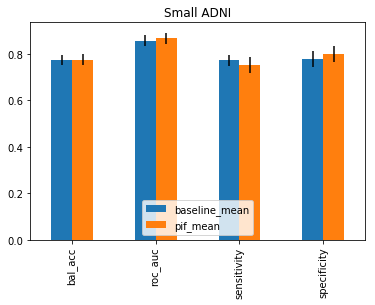

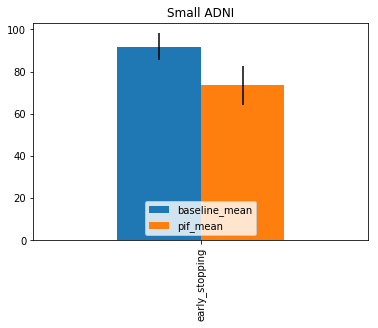

In [8]:
plot_res_errorbars(baseline_small, pif_small, title="Small ADNI")

/home/fabiane/anaconda2/envs/mort1/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


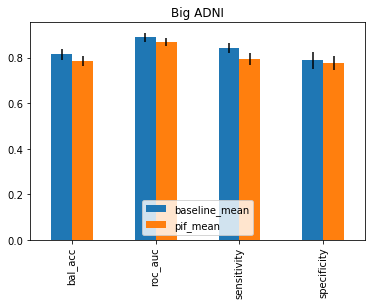

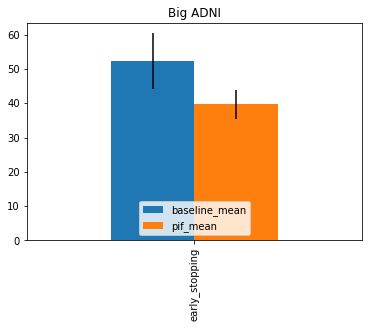

In [9]:
plot_res_errorbars(baseline_big, pif_big, title="Big ADNI")

## UKB

In [31]:
baseline_small = {
    "roc_auc" : [0.938655,0.972894,0.950149,0.943089,0.928676,0.919697,0.866092,0.972794,0.966176,0.971493],
    "bal_acc" : [0.845159,0.905861,0.857887,0.872506,0.797059,0.825,0.768942,0.908088,0.9,0.872093],
    "sensitivity" : [0.787879,0.914286,0.809524,0.818182,0.794118,0.75,0.677419,0.941176,1,1],
    "specificity" : [0.902439,0.897436,0.90625,0.926829,0.8,0.9,0.860465,0.875,0.8,0.744186],
    "early_stopping" : [147,161,200,161,111,156,92,129,156,200],
}

pif_small = {
    "roc_auc" : [0.955654,0.964835,0.945685,0.89357,0.906618,0.940909,0.905851,0.966176,0.939706,0.980495],
    "bal_acc" : [0.936068,0.907326,0.889881,0.808204,0.801471,0.831818,0.837959,0.845588,0.897794,0.906977],
    "sensitivity" : [0.969697,0.942857,0.904762,0.909091,0.852941,0.863636,0.83871,0.941176,0.970588,1],
    "specificity" : [0.902439,0.871795,0.875,0.707317,0.75,0.8,0.837209,0.75,0.825,0.813953],
    "early_stopping" : [110,112,89,52,122,164,65,150,82,200],
    
}

liu_small = {
    "roc_auc" : [0.718404,0.614652,0.732887,0.66371,0.628676,0.609848,0.651538,0.582353,0.7,0.629407],
    "bal_acc" : [0.521064,0.532234,0.607887,0.493718,0.511765,0.542424,0.536759,0.580147,0.651471,0.546512],
    "sensitivity" : [0.090909,0.628571,0.309524,0.060606,0.323529,0.318182,0.096774,0.735294,0.852941,1],
    "specificity" : [0.95122,0.435897,0.90625,0.926829,0.7,0.766667,0.976744,0.425,0.45,0.093023],
    "early_stopping" : [185,190,205,186,189,202,192,177,190,173]
}

baseline_big = {
    "roc_auc" : [0.989628,0.986658],
    "bal_acc" : [0.937332,0.935495],
    "sensitivity" : [0.965116,0.96732],
    "specificity" : [0.909548,0.90367],
    "early_stopping" : [140,184],
}

pif_big = {
    "roc_auc" : [0.99293,0.989117],
    "bal_acc" : [0.946447,0.937789],
    "sensitivity" : [0.988372,0.96732],
    "specificity" : [0.904523,0.908257],
    "early_stopping" : [104,75],
}

liu_big = {
    "roc_auc" : [0.777083,0.811177],
    "bal_acc" : [0.688574,0.746522],
    "sensitivity" : [0.668605,0.653595],
    "specificity" : [0.708543,0.83945],
    "early_stopping" : [144,144]
}

In [35]:
for key in baseline_small.keys():
    print(key)
    print("Baseline vs PIF", ranksums(baseline_small[key], pif_small[key]))
    print("Baseline vs LIU", ranksums(baseline_small[key], liu_small[key]))
    print("LIU vs PIF", ranksums(liu_small[key], pif_small[key]))

roc_auc
Baseline vs PIF RanksumsResult(statistic=0.41576092031014994, pvalue=0.67758495795247553)
Baseline vs LIU RanksumsResult(statistic=3.7796447300922722, pvalue=0.00015705228423075119)
LIU vs PIF RanksumsResult(statistic=-3.7796447300922722, pvalue=0.00015705228423075119)
bal_acc
Baseline vs PIF RanksumsResult(statistic=-0.45355736761107268, pvalue=0.65014744409485448)
Baseline vs LIU RanksumsResult(statistic=3.7796447300922722, pvalue=0.00015705228423075119)
LIU vs PIF RanksumsResult(statistic=-3.7796447300922722, pvalue=0.00015705228423075119)
sensitivity
Baseline vs PIF RanksumsResult(statistic=-1.5496543393378317, pvalue=0.12122450301291662)
Baseline vs LIU RanksumsResult(statistic=2.5701584164627453, pvalue=0.010165201891956259)
LIU vs PIF RanksumsResult(statistic=-2.9481228894719727, pvalue=0.0031970994479345307)
specificity
Baseline vs PIF RanksumsResult(statistic=1.5874507866387544, pvalue=0.1124105846553637)
Baseline vs LIU RanksumsResult(statistic=0.83152184062029988, pv

In [33]:
for key in baseline_big.keys():
    print(key)
    print("Baseline vs PIF", ranksums(baseline_big[key], pif_big[key]))
    print("Baseline vs LIU", ranksums(baseline_big[key], liu_big[key]))
    print("LIU vs PIF", ranksums(liu_big[key], pif_big[key]))

roc_auc
Baseline vs PIF RanksumsResult(statistic=-0.7745966692414834, pvalue=0.43857802608099983)
Baseline vs LIU RanksumsResult(statistic=1.5491933384829668, pvalue=0.12133525035848211)
LIU vs PIF RanksumsResult(statistic=-1.5491933384829668, pvalue=0.12133525035848211)
bal_acc
Baseline vs PIF RanksumsResult(statistic=-1.5491933384829668, pvalue=0.12133525035848211)
Baseline vs LIU RanksumsResult(statistic=1.5491933384829668, pvalue=0.12133525035848211)
LIU vs PIF RanksumsResult(statistic=-1.5491933384829668, pvalue=0.12133525035848211)
sensitivity
Baseline vs PIF RanksumsResult(statistic=-1.1618950038622251, pvalue=0.24527811680677281)
Baseline vs LIU RanksumsResult(statistic=1.5491933384829668, pvalue=0.12133525035848211)
LIU vs PIF RanksumsResult(statistic=-1.5491933384829668, pvalue=0.12133525035848211)
specificity
Baseline vs PIF RanksumsResult(statistic=0.0, pvalue=1.0)
Baseline vs LIU RanksumsResult(statistic=1.5491933384829668, pvalue=0.12133525035848211)
LIU vs PIF RanksumsRe

In [34]:
print(np.mean(baseline_small["bal_acc"]))
print(np.std(baseline_small["bal_acc"]))
print(np.mean(pif_small["bal_acc"]))
print(np.std(pif_small["bal_acc"]))

0.8552595
0.0444932053717
0.8663086
0.0444436853697


/home/fabiane/anaconda2/envs/mort1/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


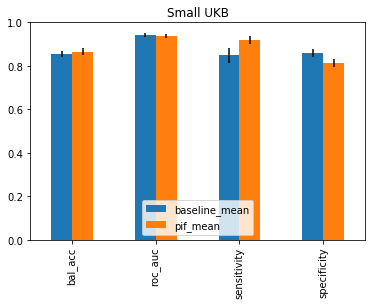

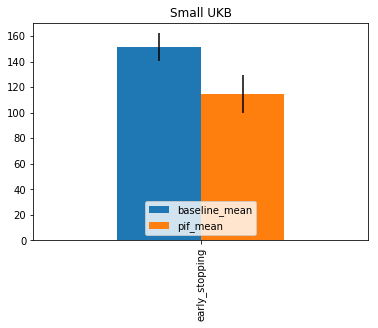

In [14]:
plot_res_errorbars(baseline_small, pif_small, title="Small UKB")

/home/fabiane/anaconda2/envs/mort1/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


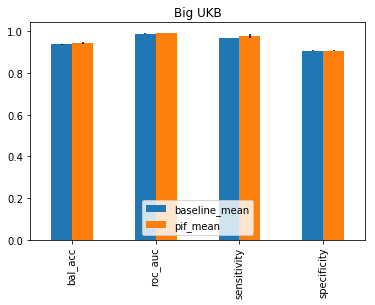

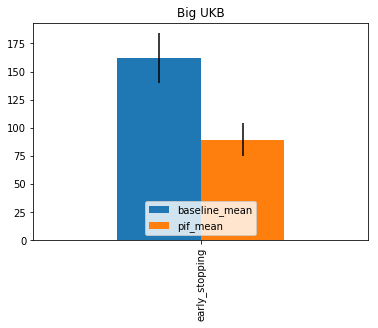

In [15]:
plot_res_errorbars(baseline_big, pif_big, title="Big UKB")

## MS

In [22]:
baseline_small = {
    "roc_auc" : [0.80303,0.722222,0.869231,0.880952,0.968254,0.960317,0.984848,0.924242,0.84127,0.780303],
    "bal_acc" : [0.82197,0.650794,0.723077,0.857143,0.964286,0.888889,0.867424,0.867424,0.706349,0.700758],
    "sensitivity" : [0.916667,0.444444,0.846154,0.714286,1,0.777778,0.916667,0.916667,0.857143,0.583333],
    "specificity" : [0.727273,0.857143,0.6,1,0.928571,1,0.818182,0.818182,0.555556,0.818182],
    "early_stopping" : [65,58,128,200,115,57,75,64,76,62],
}

pif_small = {
    "roc_auc" : [0.901515,0.809524,0.8,0.785714,0.880952,0.968254,0.94697,0.969697,0.801587,0.757576],
    "bal_acc" : [0.784091,0.706349,0.696154,0.765873,0.694444,0.853175,0.875,0.958333,0.801587,0.647727],
    "sensitivity" : [0.75,0.555556,0.692308,0.642857,0.888889,0.777778,0.75,0.916667,0.714286,0.75],
    "specificity" : [0.818182,0.857143,0.7,0.888889,0.5,0.928571,1,1,0.888889,0.545455],
    "early_stopping" : [55,63,78,79,55,99,58,64,76,55],
}

liu_small = {
    "roc_auc" : [0.772727,0.833333,0.676923,0.825397,0.81746,0.944444,0.878788,0.772727,0.880952,0.69697],
    "bal_acc" : [0.590909,0.607143,0.6,0.666667,0.714286,0.571429,0.636364,0.5,0.611111,0.5],
    "sensitivity" : [1,1,1,1,1,1,1,1,1,1,],
    "specificity" : [0.181818,0.214286,0.2,0.333333,0.428571,0.142857,0.272727,0,0.222222,0],
    "early_stopping" : [178,176,163,177,179,159,161,174,184,156]
}


In [23]:
for key in baseline_small.keys():
    print(key)
    print("Baseline vs PIF", ranksums(baseline_small[key], pif_small[key]))
    print("Baseline vs LIU", ranksums(baseline_small[key], liu_small[key]))
    print("LIU vs PIF", ranksums(liu_small[key], pif_small[key]))

roc_auc
Baseline vs PIF RanksumsResult(statistic=0.30237157840738177, pvalue=0.76236881846983984)
Baseline vs LIU RanksumsResult(statistic=1.6252472339396771, pvalue=0.10410988966022681)
LIU vs PIF RanksumsResult(statistic=-1.1716898663286044, pvalue=0.24132159301718004)
bal_acc
Baseline vs PIF RanksumsResult(statistic=0.86931828792122268, pvalue=0.38467306273550872)
Baseline vs LIU RanksumsResult(statistic=3.4772731516848907, pvalue=0.00050654148469228999)
LIU vs PIF RanksumsResult(statistic=-3.4016802570830453, pvalue=0.00066972944902182708)
sensitivity
Baseline vs PIF RanksumsResult(statistic=1.24728276093045, pvalue=0.21229383619233155)
Baseline vs LIU RanksumsResult(statistic=-3.4016802570830453, pvalue=0.00066972944902182708)
LIU vs PIF RanksumsResult(statistic=3.7796447300922722, pvalue=0.00015705228423075119)
specificity
Baseline vs PIF RanksumsResult(statistic=-0.18898223650461363, pvalue=0.85010673913852586)
Baseline vs LIU RanksumsResult(statistic=3.7796447300922722, pvalue=

/home/fabiane/anaconda2/envs/mort1/lib/python3.6/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


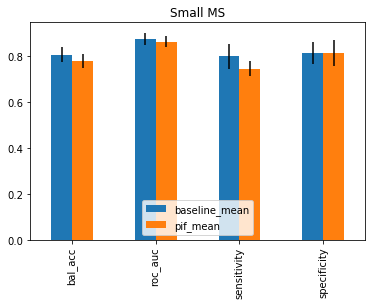

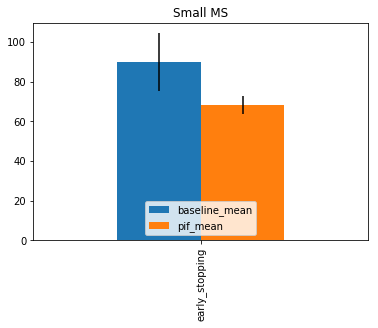

In [18]:
plot_res_errorbars(baseline_small, pif_small, title="Small MS")